Importing Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten, Dropout

# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

Loading the Dataset 

In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input_image(i):
    plt.imshow(X_train[i],cmap='binary',interpolation='nearest')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

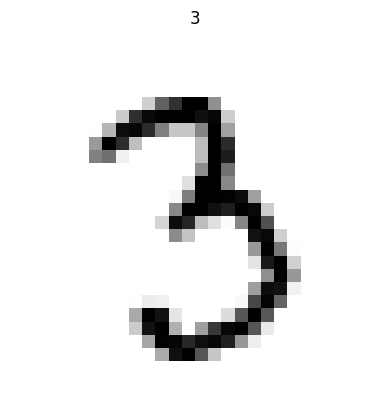

In [5]:
plot_input_image(30000)

Pre-processing

In [6]:
# Normalizing the image to [0,1] range

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Reshaping or Expanding the dimensions of image from
# (28,28) to (28,28,1)

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [7]:
# One-hot encoding

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Building the Model

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())

model.add(Dropout(0.25))
# 25 % value is dropped ; can also try with value 0.5 for 50 % to be dropped

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [11]:
# EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

# Model Checkpoint
mc = ModelCheckpoint("./model.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es,mc]

Model Training 

In [12]:
model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=cb)

Epoch 1/10
1311/1313 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9366
Epoch 1: val_accuracy improved from -inf to 0.97939, saving model to .\model.h5
1313/1313 [==============================] - 36s 26ms/step - loss: 0.2048 - accuracy: 0.9367 - val_loss: 0.0677 - val_accuracy: 0.9794
Epoch 2/10
1313/1313 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9787
Epoch 2: val_accuracy improved from 0.97939 to 0.98328, saving model to .\model.h5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0656 - accuracy: 0.9787 - val_loss: 0.0532 - val_accuracy: 0.9833
Epoch 3/10
1311/1313 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9846
Epoch 3: val_accuracy improved from 0.98328 to 0.98700, saving model to .\model.h5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0416 - val_accuracy: 0.9870
Epoch 4/10
1313/1313 [==============================] -

In [13]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"The Loss of the model is {loss}")
print(f"The Accuracy of the model is {accuracy*100}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0327 - accuracy: 0.9898
The Loss of the model is 0.03267974033951759
The Accuracy of the model is 98.9799976348877
